## 1. Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

In [2]:
#Create a path to where the data is stored.
path = r'/Users/vicky/OneDrive/文件/careerfoundry/Machine Learning with Python/Datasets'

In [3]:
# Ensures the charts created are displayed in the notebook without the need to "call" them.
%matplotlib inline

In [4]:
#Read in the Cleaned European weather data between 2010-2019.
df = pd.read_csv(os.path.join(path,'climate__DUSSELDORF_nodate_cleaned.csv'), index_col=0)

In [5]:
df

,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max
0,8,5.4,0.83,1.0161,0.12,0.08,0,0.0,10.0,7.0,11.5
1,8,3.6,0.89,1.0161,0.18,0.66,0,0.5,8.2,7.4,11.0
2,7,3.1,0.95,1.0161,0.12,0.07,0,0.0,7.1,6.9,9.1
3,8,2.7,0.86,1.0161,0.12,0.02,0,0.0,6.8,3.6,8.0
4,7,4.5,0.92,1.0161,0.12,0.62,0,0.0,7.7,6.2,11.0
...,...,...,...,...,...,...,...,...,...,...,...
22945,8,6.0,0.75,1.0214,1.13,0.20,0,6.4,17.8,13.6,21.4
22946,7,5.2,0.71,1.0186,1.13,0.20,0,4.9,19.4,15.4,23.9
22947,8,4.4,0.73,1.0196,1.13,0.20,0,4.0,18.2,13.4,22.0
22948,7,3.9,0.73,1.0176,1.13,0.20,0,6.9,16.7,11.9,21.1


In [6]:
#Read in the pleasant weather data between 2010-2019.
pleasant = pd.read_csv(os.path.join(path,'pleasant__DUSSELDORF.csv'), index_col=0)
pleasant

,DUSSELDORF_pleasant_weather
0,0
1,0
2,0
3,0
4,0
...,...
22945,0
22946,0
22947,0
22948,0


In [7]:
X = df
y = pleasant
print(X.shape)
print(y.shape)

(22950, 11)
(22950, 1)


## 2. Build Random Forse Model

In [8]:
# List of weather stations
weather = ['cloud_cover',
 'wind_speed',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'snow_depth',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

In [9]:
#Create Label
labels = {0: 'Not Pleasant', 1: 'Pleasant'}

In [10]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [11]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(18360, 11) (18360, 1)
(4590, 11) (4590, 1)


In [12]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

C:\Users\vicky\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [13]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


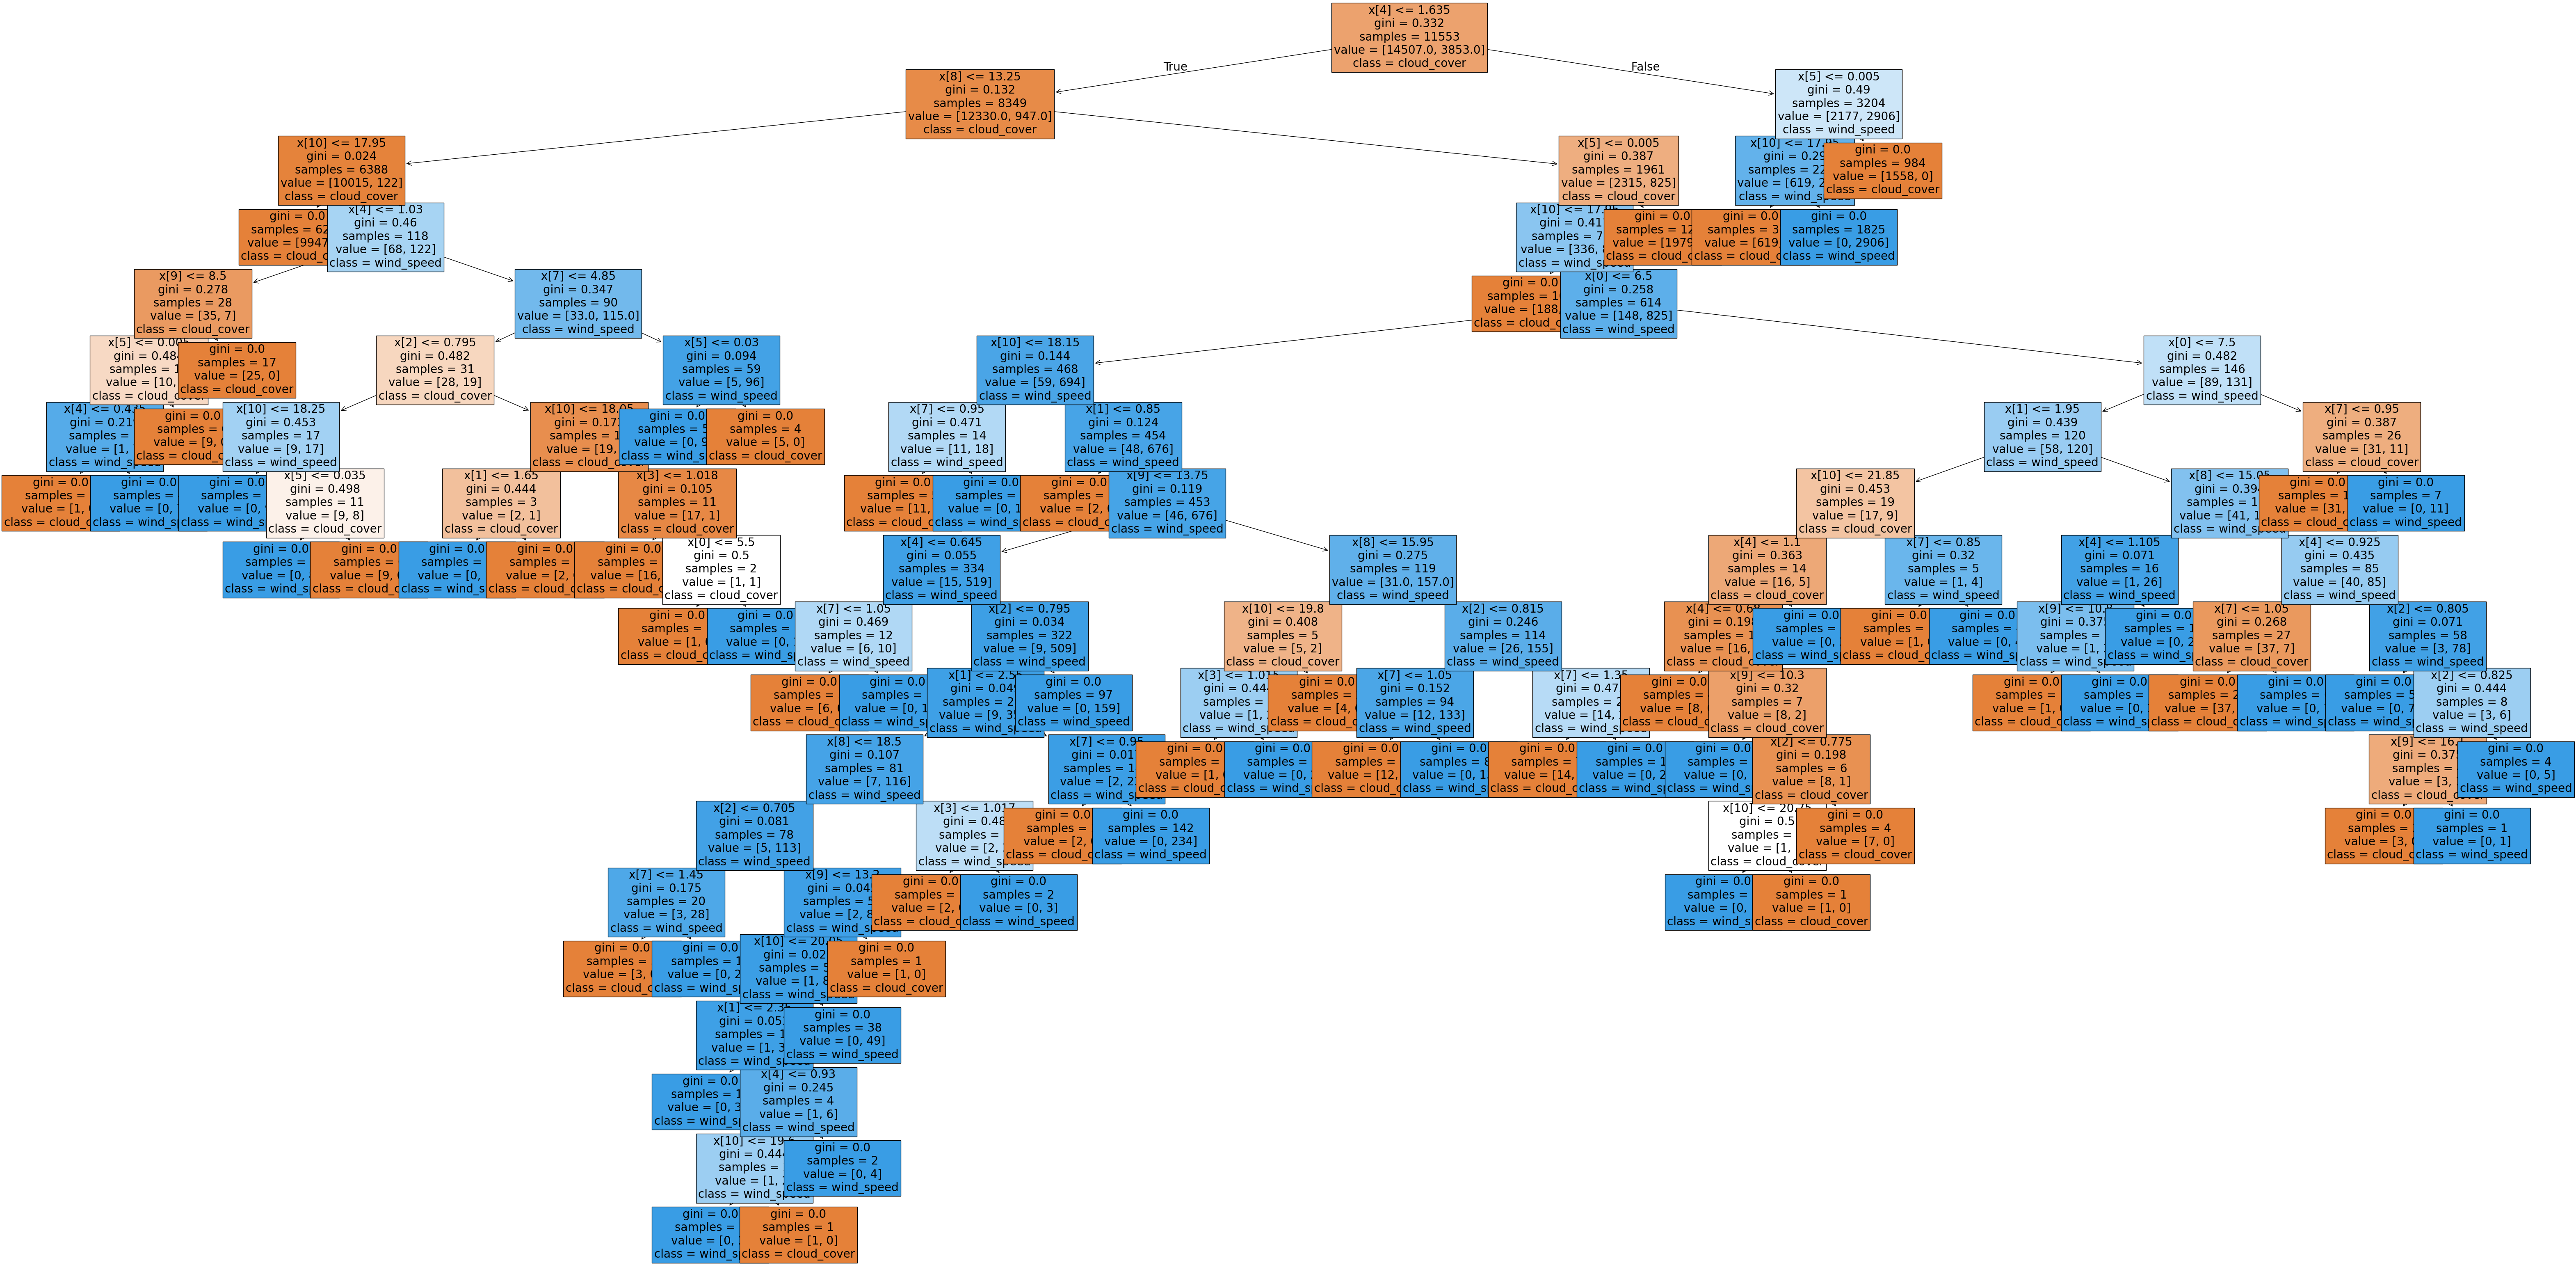

In [15]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[12], fontsize = 20, class_names=weather, filled=True);#, feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True); max_depth = 4, 

In [16]:
np.set_printoptions(threshold=np.inf)
newarray = clf.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([3.69894468e-02, 1.00430905e-02, 2.49635060e-02, 1.69002117e-02,
       7.85284796e-02, 3.40344877e-01, 2.59814797e-05, 6.57320205e-02,
       1.43043422e-01, 2.06685830e-02, 2.62760382e-01])

In [17]:
np.set_printoptions(threshold=1000)

In [20]:
newarray = newarray.reshape(-1,1,11)
print(newarray.shape)
newarray

(1, 1, 11)


array([[[3.69894468e-02, 1.00430905e-02, 2.49635060e-02, 1.69002117e-02,
         7.85284796e-02, 3.40344877e-01, 2.59814797e-05, 6.57320205e-02,
         1.43043422e-01, 2.06685830e-02, 2.62760382e-01]]])

In [24]:
sumarray = np.sum(newarray[0], axis=0)
sumarray

array([3.69894468e-02, 1.00430905e-02, 2.49635060e-02, 1.69002117e-02,
       7.85284796e-02, 3.40344877e-01, 2.59814797e-05, 6.57320205e-02,
       1.43043422e-01, 2.06685830e-02, 2.62760382e-01])

In [25]:
important = pd.Series(sumarray, index = weather) #.sort_values(ascending = False)
important

cloud_cover         0.036989
wind_speed          0.010043
humidity            0.024964
pressure            0.016900
global_radiation    0.078528
precipitation       0.340345
snow_depth          0.000026
sunshine            0.065732
temp_mean           0.143043
temp_min            0.020669
temp_max            0.262760
dtype: float64

['cloud_cover', 'wind_speed', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'snow_depth', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


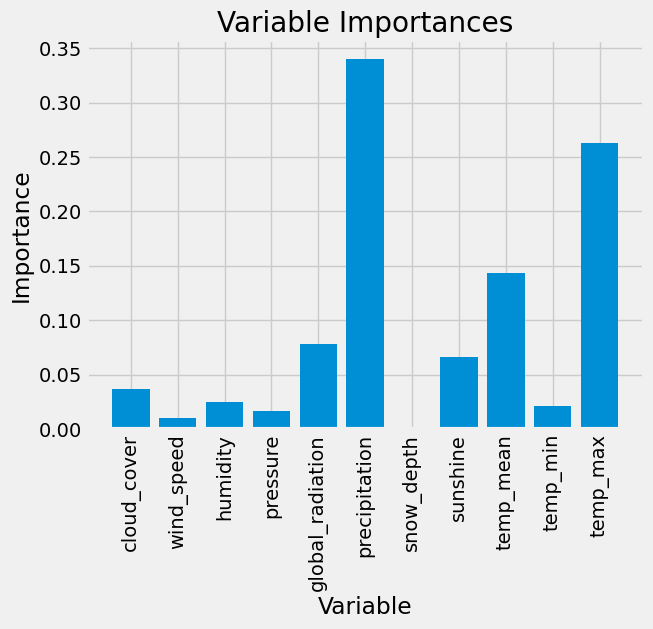

In [28]:
# Conduct variable importances by most influential weather station (broad analysis)
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(weather)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, weather, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

## 3. Grid Search

In [29]:
# Grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [30]:
start = time.time()
grid = GridSearchCV(clf,param_grid=grid_space,cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


C:\Users\vicky\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
432 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
432 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\vicky\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vicky\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\vicky\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\vicky\anaconda3\Lib\site-packa

Search took 1.09973384141922 minutes


In [31]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': 5, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best GRID search score is: 1.0


## 4. RANDOM SEARCH

In [32]:
# Random search cv
rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [33]:
# creating a RF classifier
clf2= RandomForestClassifier()

In [34]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3) #500
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits


C:\Users\vicky\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Search took 1.6350356817245484 minutes


In [35]:
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 80, 'max_features': 5, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 60}
Best RANDOM search score is: 1.0


## 5. creating a RF classifier with the best results from above

In [36]:
clf3 = RandomForestClassifier(n_estimators = 100, max_depth=5, max_features=5, min_samples_leaf=1, min_samples_split=2, criterion = 'entropy')  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

C:\Users\vicky\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(criterion='entropy', max_depth=5, max_features=5)

In [37]:
# performing predictions on the test dataset
y_pred = clf3.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


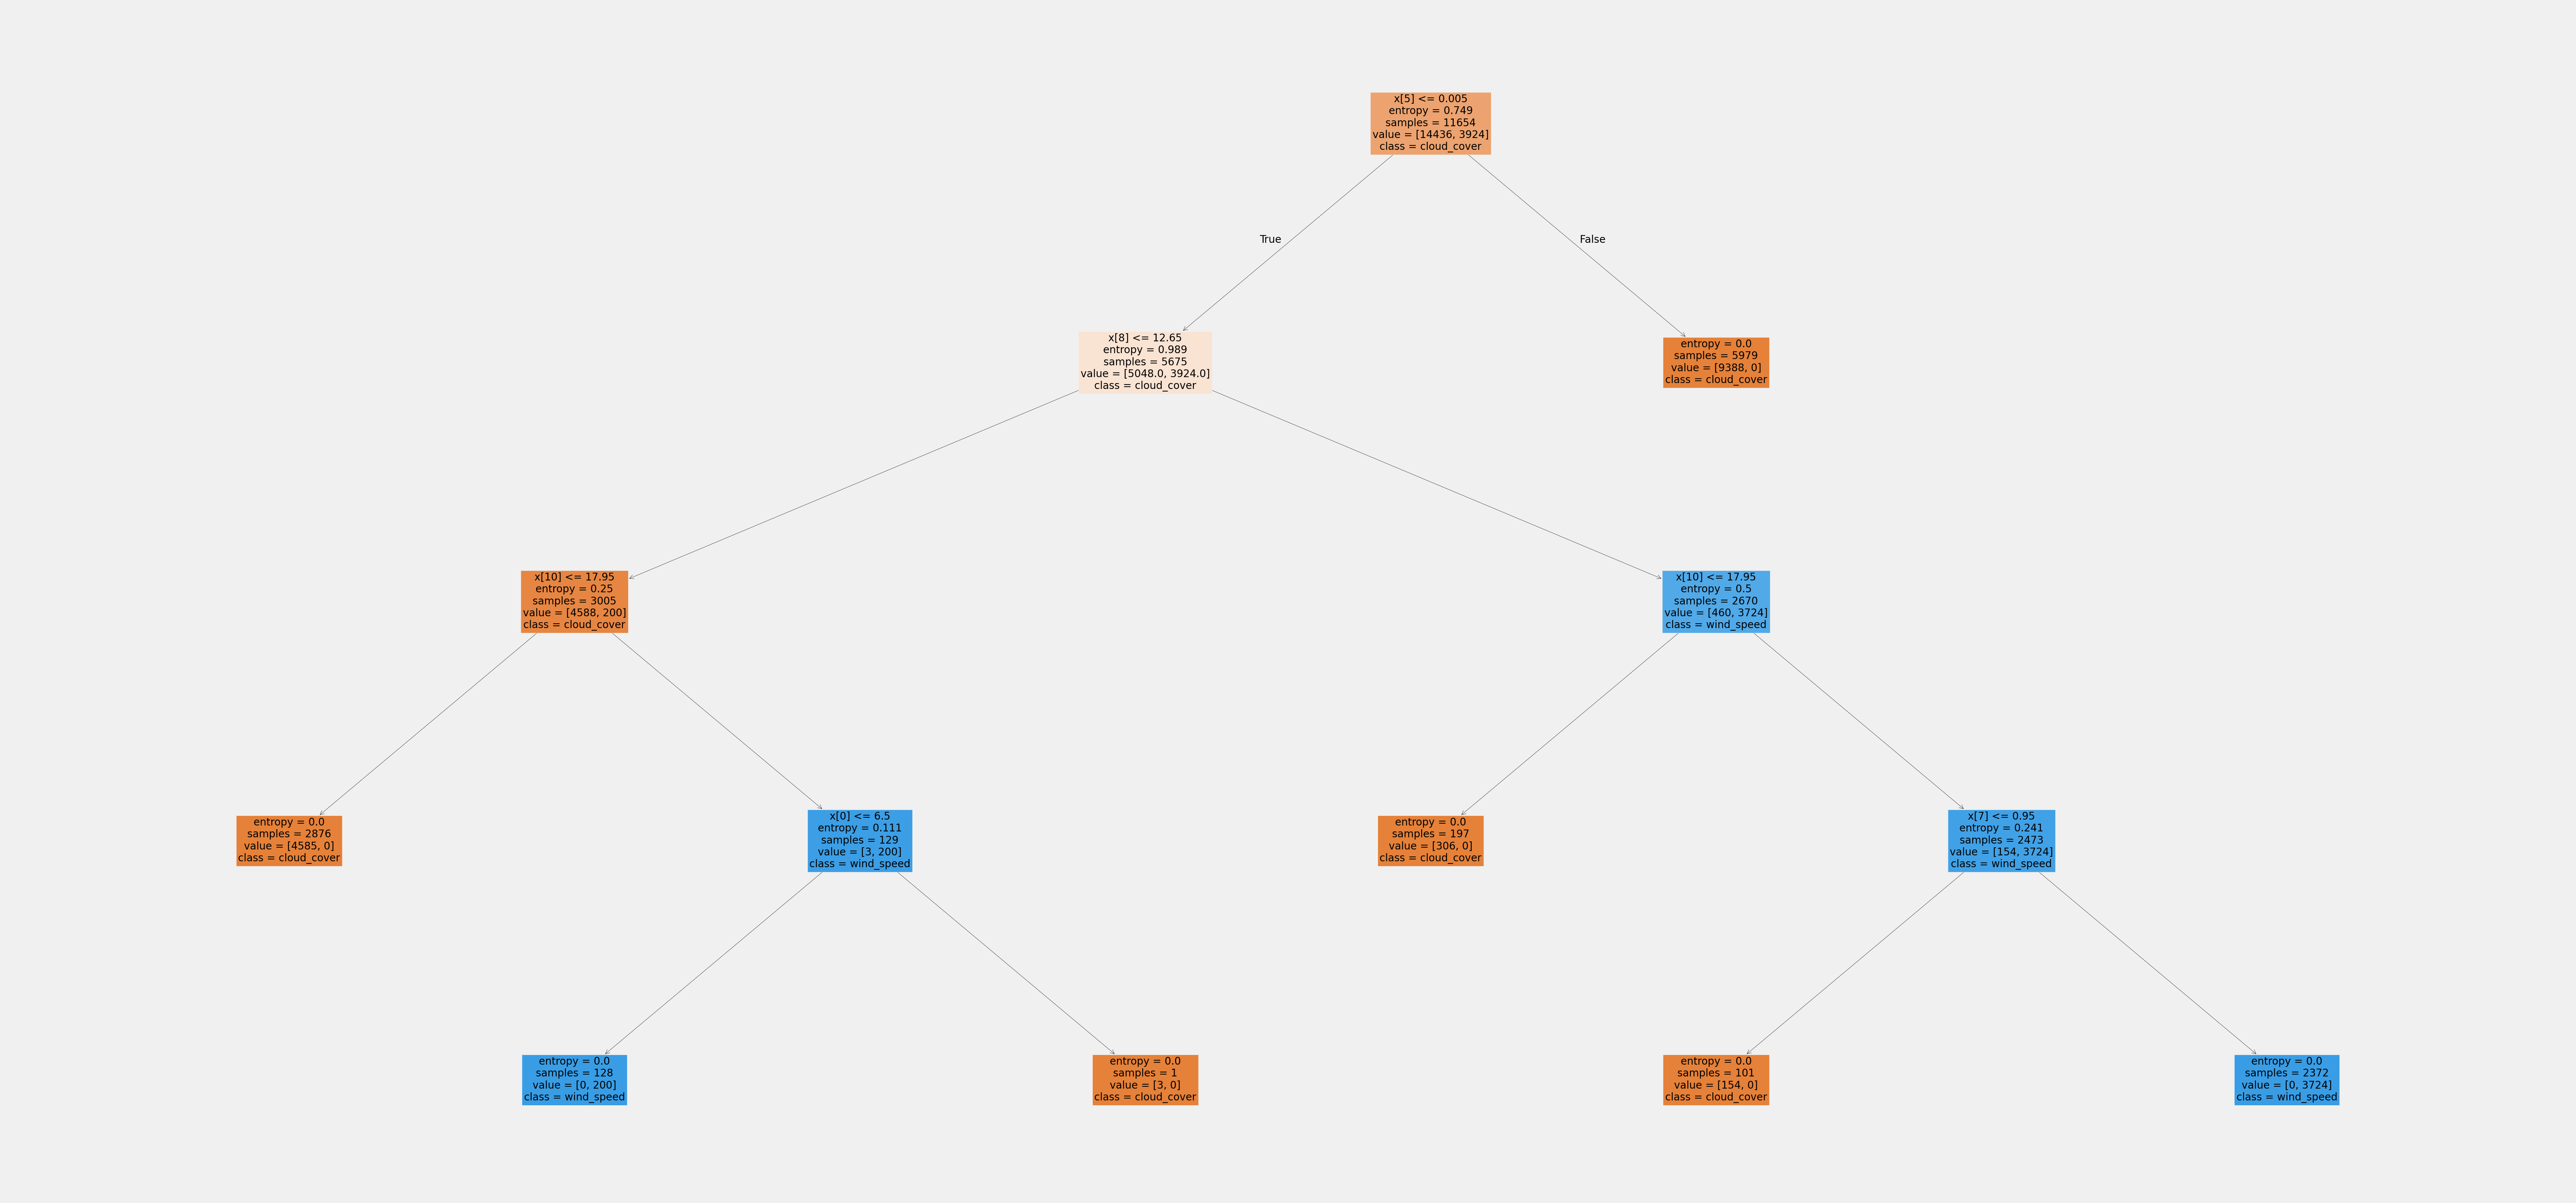

In [38]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[10], fontsize = 20, class_names=weather, filled=True);#, feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True); max_depth = 4, 

In [39]:
np.set_printoptions(threshold=np.inf)
newarray = clf3.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([0.02209915, 0.00086579, 0.00535049, 0.00579788, 0.05340111,
       0.34537532, 0.        , 0.06279691, 0.09790343, 0.014952  ,
       0.39145793])

In [33]:
np.set_printoptions(threshold=1000)

In [40]:
newarray = newarray.reshape(-1,11,1)
print(newarray.shape)
newarray

(1, 11, 1)


array([[[0.02209915],
        [0.00086579],
        [0.00535049],
        [0.00579788],
        [0.05340111],
        [0.34537532],
        [0.        ],
        [0.06279691],
        [0.09790343],
        [0.014952  ],
        [0.39145793]]])

In [42]:
sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.02209915, 0.00086579, 0.00535049, 0.00579788, 0.05340111,
       0.34537532, 0.        , 0.06279691, 0.09790343, 0.014952  ,
       0.39145793])

In [43]:
important = pd.Series(sumarray, index = weather) #.sort_values(ascending = False)
important

cloud_cover         0.022099
wind_speed          0.000866
humidity            0.005350
pressure            0.005798
global_radiation    0.053401
precipitation       0.345375
snow_depth          0.000000
sunshine            0.062797
temp_mean           0.097903
temp_min            0.014952
temp_max            0.391458
dtype: float64

['cloud_cover', 'wind_speed', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'snow_depth', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


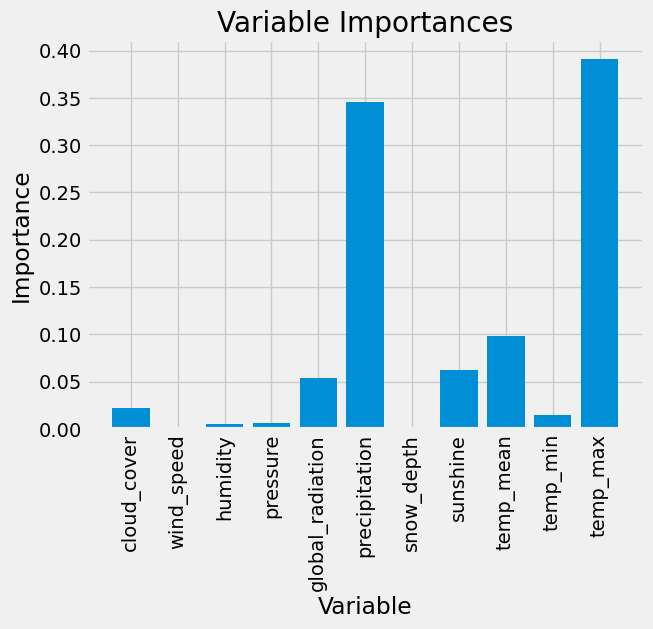

In [44]:
# Conduct variable importances by most influential weather station (broad analysis)
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(weather)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, weather, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');